In [57]:
import pandas as pd
from dataprep.eda import plot
import matplotlib.pyplot as plt
import numpy as np

In [58]:
import matplotlib
matplotlib.__version__

'3.1.1'

In [2]:
admission = pd.read_csv("mimic/ADMISSIONS.csv")
diagnoses_d = pd.read_csv("mimic/D_ICD_DIAGNOSES.csv")
diagnoses = pd.read_csv("mimic/DIAGNOSES_ICD.csv")
icu = pd.read_csv("mimic/ICUSTAYS.csv")
prescriptions = pd.read_csv("mimic/PRESCRIPTIONS.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
patient = pd.read_csv("mimic/PATIENTS.csv")

In [3]:
def assign_category(icd9_code):
    try:
        code = int(icd9_code)
        if code >= 10000:
            code = code // 100
        elif code >= 1000:
            code = code // 10
        else:
            pass
        if code <= 139:
            return 0
        if code <= 239:
            return 1
        if code <= 279:
            return 2
        if code <= 289:
            return 3
        if code <= 319:
            return 4
        if code <= 389:
            return 5
        if code <= 459:
            return 6
        if code <= 519:
            return 7
        if code <= 579:
            return 8
        if code <= 629:
            return 9
        if code <= 679:
            return 10
        if code <= 709:
            return 11
        if code <= 739:
            return 12
        if code <= 759:
            return 13
        if code <= 779:
            return 14
        if code <= 799:
            return 15
        return 16
    except:
        return 17

D_Category = {
    0: 'infectious and parasitic diseases',
    1: 'neoplasms',
    2: 'endocrine, nutritional and metabolic diseases, and immunity disorders',
    3: 'diseases of the blood and blood-forming organs',
    4: 'mental disorders',
    5: 'diseases of the nervous system and sense organs',
    6: 'diseases of the circulatory system',
    7: 'diseases of the respiratory system',
    8: 'diseases of the digestive system',
    9: 'diseases of the genitourinary system',
    10: 'complications of pregnancy, childbirth, and the puerperium',
    11: 'diseases of the skin and subcutaneous tissue',
    12: 'diseases of the musculoskeletal system and connective tissue',
    13: 'congenital anomalies',
    14: 'certain conditions originating in the perinatal period',
    15: 'symptoms, signs, and ill-defined conditions',
    16: ' injury and poisoning',
    17: 'external causes of injury and supplemental classification'
}
# Add Diagnoses group column
diagnoses['category'] = diagnoses['ICD9_CODE'].apply(assign_category)

In [4]:
import seaborn as sns

In [ ]:
# Admission Diagnoses & Final Diagnoses

In [5]:
adm_diag = admission.merge(diagnoses, on='HADM_ID')[['DIAGNOSIS', 'ICD9_CODE', 'category']]
plot(adm_diag)

GridBox(id='1116', ...)

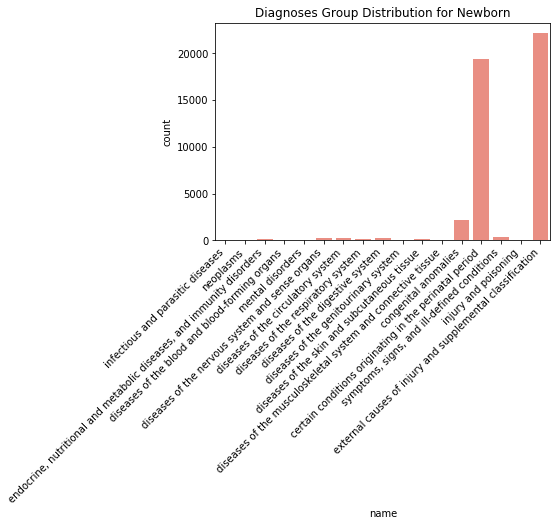

In [8]:
# Newborn
newborn = adm_diag[adm_diag['DIAGNOSIS']=='NEWBORN']
newborn = newborn.groupby('category').size().rename('count').sort_values(ascending=False).reset_index().head(20)
newborn['name'] = newborn['category'].map(lambda x: D_Category[x])
newborn = newborn.sort_values(by='category')
chart = sns.barplot(x='name', y='count', data=newborn, color='salmon')
chart.set_title('Diagnoses Group Distribution for Newborn')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

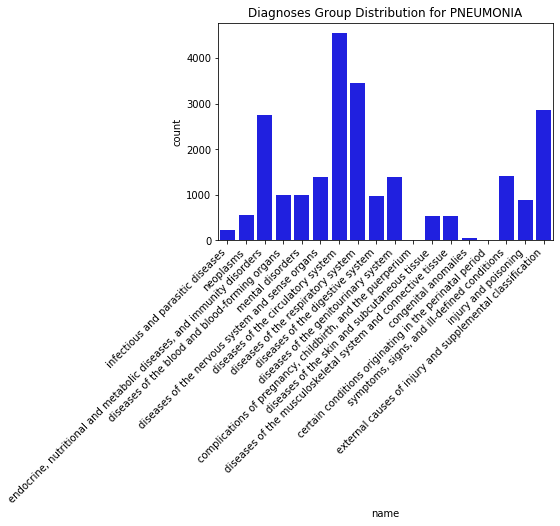

In [112]:
# PNEUMONIA
pneumonia = adm_diag[adm_diag['DIAGNOSIS']=='PNEUMONIA']
pneumonia = pneumonia.groupby('category').size().rename('count').sort_values(ascending=False).reset_index().head(20)
pneumonia['name'] = pneumonia['category'].map(lambda x: D_Category[x])
pneumonia = pneumonia.sort_values(by='category')

pneumonia_s = adm_diag[adm_diag['DIAGNOSIS']=='PNEUMONIA']
pneumonia_s = pneumonia_s.groupby('ICD9_CODE').size().rename('count').sort_values(ascending=False).reset_index().head(20)
pneumonia_s = pneumonia_s.merge(diagnoses_d, on='ICD9_CODE')
pneumonia_s
ax1 = sns.barplot(x='name', y='count', data=pneumonia, color='blue')
ax1.set_title('Diagnoses Group Distribution for PNEUMONIA')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right');

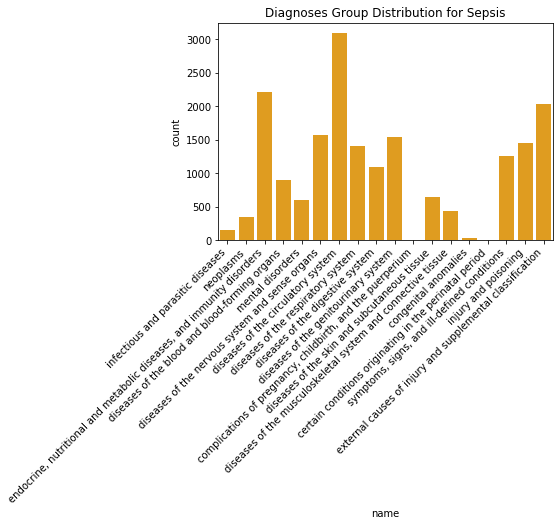

In [104]:
# SEPSIS
sepsis = adm_diag[adm_diag['DIAGNOSIS']=='SEPSIS']
sepsis = sepsis.groupby('category').size().rename('count').sort_values(ascending=False).reset_index().head(20)
sepsis['name'] = sepsis['category'].map(lambda x: D_Category[x])
sepsis = sepsis.sort_values(by='category')
chart = sns.barplot(x='name', y='count', data=sepsis, color='orange')
chart.set_title('Diagnoses Group Distribution for Sepsis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

# length of stay analysis

In [10]:
# process missing value 
missing = icu['LOS'].isnull().sum()
percentage = missing/icu['LOS'].count()*100
print("ICU_STAY LOS Missing Value: %.2f" % percentage, "%")

icu['LOS'] = icu['LOS'].fillna(icu['LOS'].mean())

ICU_STAY LOS Missing Value: 0.02 %


In [ ]:
icu_diag = icu.merge(diagnoses, on='HADM_ID')
icu_diag['name'] = icu_diag['category'].map(lambda x: D_Category[x])

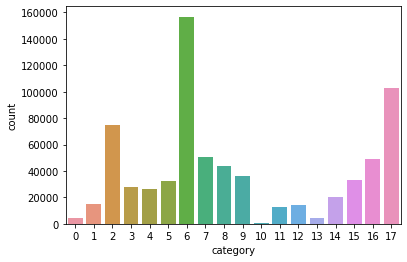

In [15]:
diag_count = icu_diag.groupby('category').size().rename('count').reset_index()
sns.barplot(x='category', y='count', data=diag_count)

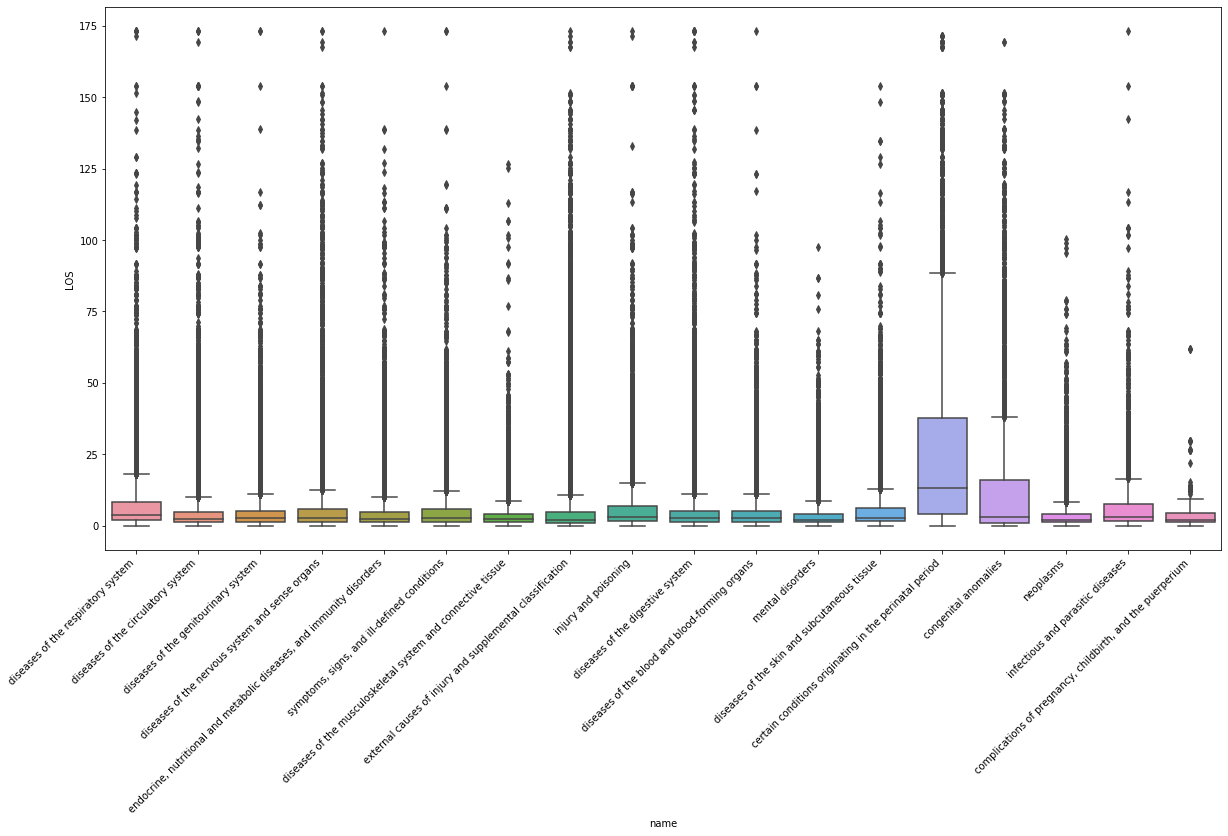

In [16]:
plt.figure(figsize=(20, 10))
chart = sns.boxplot(x="name", y="LOS", data=icu_diag)
# chart.set_ylim([0, 100])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

##### ???????

In [68]:
def los_period(los):
    if los <=1:
        return 'within 1 day'
    if los <=7:
        return 'within 1 week'
    if los <=14:
        return 'within 2 weeks'
    if los <=31:
        return 'within 1 month'
    if los <=100:
        return 'within 100 days'
    if los <=150:
        return 'within 150 days'
    else:
        return 'more than 150 days'
    

In [87]:
icu_diag['los_period'] = icu_diag['LOS'].map(los_period)
icu_diag = icu_diag.groupby(['name', 'category', 'los_period']).size().rename('count').reset_index()
icu_diag

,name,category,los_period,count
0,injury and poisoning,16,more than 150 days,8
1,injury and poisoning,16,within 1 day,6035
2,injury and poisoning,16,within 1 month,4474
3,injury and poisoning,16,within 1 week,31146
4,injury and poisoning,16,within 100 days,1195
...,...,...,...,...
115,"symptoms, signs, and ill-defined conditions",15,within 1 month,2142
116,"symptoms, signs, and ill-defined conditions",15,within 1 week,21955
117,"symptoms, signs, and ill-defined conditions",15,within 100 days,579
118,"symptoms, signs, and ill-defined conditions",15,within 150 days,13


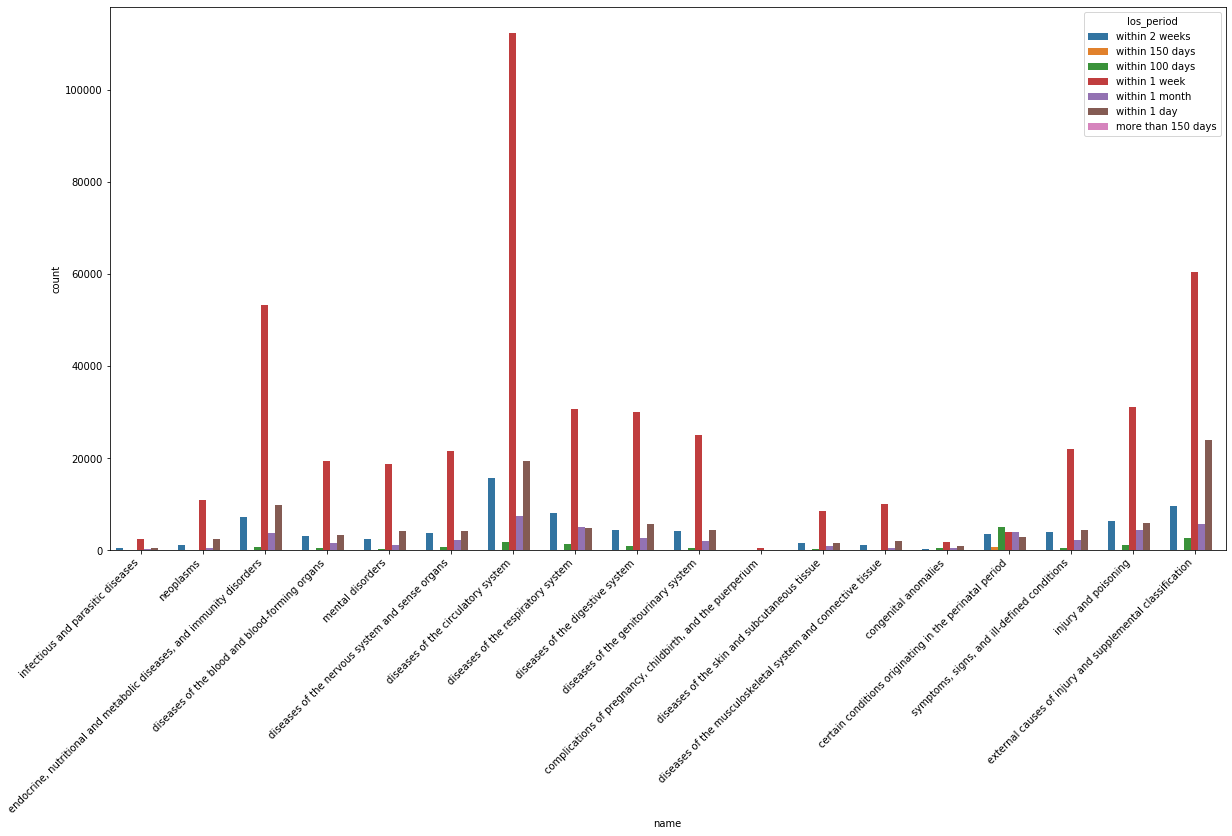

In [91]:
plt.figure(figsize=(20, 10))
icu_diag = icu_diag.sort_values(by='category')
chart1 = sns.barplot(x="name", y="count",
                  hue="los_period", data=icu_diag)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right');

# Diagnoses Co-occurrance


In [69]:
patient_diag = patient.merge(diagnoses, on='SUBJECT_ID')
patient_diag_grouped = patient_diag.groupby('SUBJECT_ID')['category'].apply(lambda x: x.tolist())
patient_diag_grouped

SUBJECT_ID
2                                             [17, 17, 17]
3                            [5, 15, 9, 6, 6, 6, 11, 6, 2]
4                          [0, 0, 15, 2, 15, 8, 6, 17, 17]
5                                             [17, 17, 17]
6                               [6, 6, 16, 2, 2, 3, 2, 17]
                               ...                        
99985          [5, 7, 7, 7, 15, 17, 16, 2, 2, 3, 8, 17, 1]
99991    [8, 5, 8, 9, 16, 8, 15, 8, 15, 6, 6, 12, 8, 2,...
99992               [16, 8, 8, 3, 9, 8, 12, 8, 6, 2, 8, 4]
99995    [6, 6, 16, 3, 6, 2, 16, 16, 17, 2, 17, 6, 17, ...
99999                                    [13, 15, 6, 2, 6]
Name: category, Length: 46520, dtype: object

In [50]:
patient_diag_unique = patient_diag_grouped.apply(lambda x: list(dict.fromkeys(x)))

In [70]:
def diagnoses_flag(x):
    result = [0 for i in range(18)]
    for i in x:
        result[i] += 1
    return result
patient_diag_count = patient_diag_grouped.apply(lambda x: diagnoses_flag(x))
# patient_diag_unique = patient_diag_unique.apply(lambda x: diagnoses_flag(x))


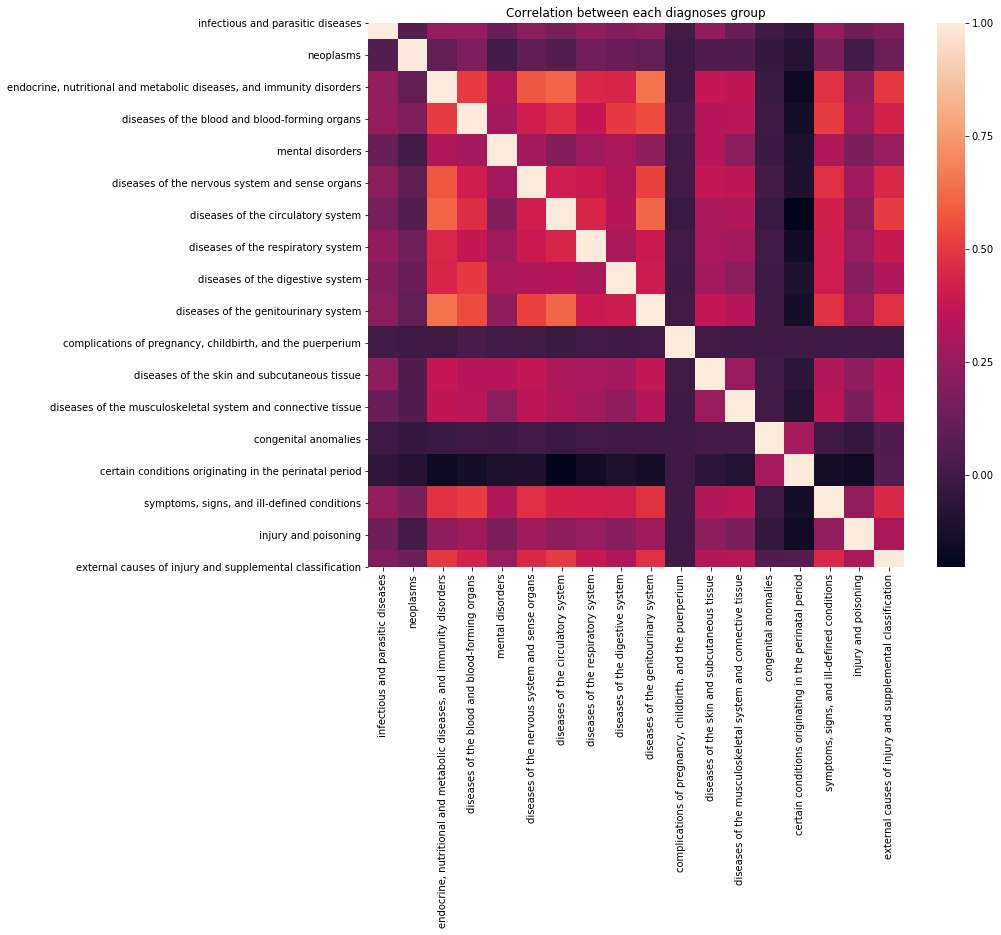

In [71]:
patient_diag_df = pd.DataFrame(patient_diag_count.tolist(), columns=[D_Category[x] for x in D_Category])

corr = patient_diag_df.corr()

plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr)
ax.set_title('Correlation between each diagnoses group');

In [65]:

# patient_diag_u_df = pd.DataFrame(patient_diag_unique.tolist(), columns=[D_Category[x] for x in D_Category])
# corr2 = patient_diag_u_df.corr()
# import numpy as np
# # corr
# plt.figure(figsize=(12, 10))
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(corr2, mask=mask)



In [83]:
# pair count matrix
patient_diag_unique = patient_diag_grouped.apply(lambda x: list(dict.fromkeys(x))).reset_index()

patient_diag_unique

,SUBJECT_ID,category
0,2,[17]
1,3,"[5, 15, 9, 6, 11, 2]"
2,4,"[0, 15, 2, 8, 6, 17]"
3,5,[17]
4,6,"[6, 16, 2, 3, 17]"
...,...,...
46515,99985,"[5, 7, 15, 17, 16, 2, 3, 8, 1]"
46516,99991,"[8, 5, 9, 16, 15, 6, 12, 2, 17]"
46517,99992,"[16, 8, 3, 9, 12, 6, 2, 4]"
46518,99995,"[6, 16, 3, 2, 17]"


In [102]:
from itertools import combinations 

def get_comb(x):
    x.sort()
    if len(x)>1:
        comb = combinations(x, 2)
        return list(comb)
    else:
        return None
patient_diag_comb = patient_diag_unique['category'].apply(lambda x: get_comb(x)).reset_index()
patient_diag_comb = patient_diag_comb.dropna()
# patient_diag_comb
matrix = np.zeros((18, 18))
def update_matrix(x):
    for pair in x:
        matrix[pair[0]][pair[1]]+=1
    return 0
a = patient_diag_comb['category'].apply(lambda x: update_matrix(x))


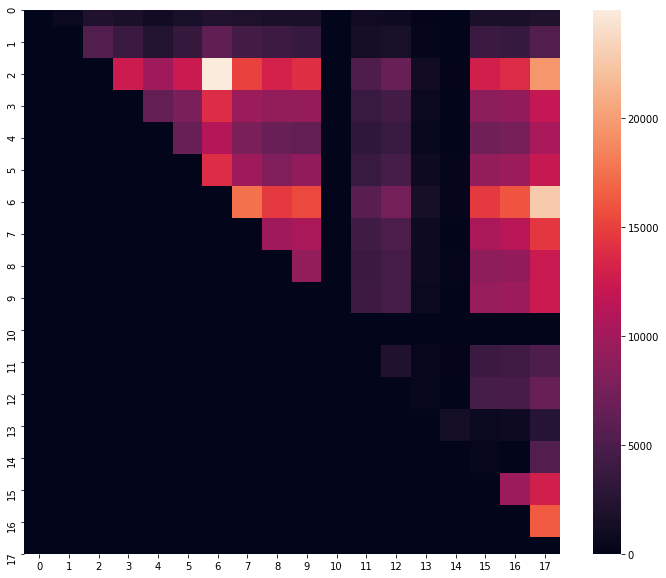

In [103]:
plt.figure(figsize=(12, 10))
sns.heatmap(matrix);